# Pandas 판다스
---
- 데이터 처리와 분석을 위한 라이브러리

- 행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있음

- 대용량의 데이터들을 처리하는데 매우 편리

- pandas 자료구조

    Series: 1차원  
    DataFrame: 2차원  
    Panel: 3차원  
###### 목차
1. Pandas DataFrame 판다스 데이터프레임
2. Pandas 판다스 통계 처리
3. Pandas plot 판다스 그래프 그리기
4. Read & write data in Pandas 판다스를 이용해 데이터 읽고 쓰기
    
- pandas 로딩
```
import numpy as np # 보통 numpy와 함께 import
import pandas as pd
```

## 1. Pandas DataFrame 판다스 데이터프레임

##### 목차
1. 1-1. 데이터 조회 및 추출
    1. 1-1. 열 조회
    2. 1-1-2. 조건으로 조회 : .loc
    3. 1-1-3. 여러 조건으로 조회
    4. 1-1-4. 정렬해서 보기
---
- 2차원 자료구조
- 행레이블/ 열레이블, 데이터로 구성된다.
- 딕셔너리에서 데이터프레임 생성한다.

- Pandas 사용 목적이 데이터프레임을 사용하기 위한 목적으로 봐도 된다.
- 데이터를 처리, 조회, 분석하는 가장 효율적인 방법이 데이터프레임을 사용하는 것이다.
- 일반적으로 접하게 되는 **테이블** 형태, **엑셀** 형태로 생각하시면 된다.
- 직접 만들 수 있으나 보통은 **csv 파일**, **엑셀 파일** 또는 DB에서 읽어온다다.

```
★[참고] 자주 사용할 만한 메서드들★

- head(): 상위 데이터 확인
- tail(): 하위 데이터 확인
- shape: 데이터프레임 크기
- values: 값 정보 확인(저장하면 2차원 numpy 배열이 됨)
- columns: 열 정보 확인
- dtypes: 열 자료형 확인
- info(): 열에 대한 상세한 정보 확인
- describe(): 기초통계정보 확인
    ㄴ describe() 메소드는 데이터에 대한 많은 정보를 제공하는 매우 중요한 메소드입니다.
    ㄴ데이터분석과정에서 자세히 살펴볼 예정이므로 여기서는 **가볍게 실행만** 해봅니다.
    ㄴ 개수(count), 평균(mean), 표준편차(std), 최솟값(min), 사분위값(25%, 50%, 75%), 최댓값(max)을 표시합니다.

```

In [61]:
import pandas as pd
# 딕셔너리
data = {
    'year':[2016, 2017, 2018, 2019],
    'GDP rate': [2.8, 3.1, 3.0, 3.0],
    'GDP': ['1.637M', '1.73M', '1.87M', '1.83M' ],
    'GDP2': ['111.17M', '2.22M', '1.1M', '0.1M' ],
    'rank': [1, 2, 3, 4 ]
}
df = pd.DataFrame(data, index=data['year']) # index추가할 수 있음

print(df) # 데이터프레임 전체 보기
print("-----------------------------")
print("head:", df.head()) # 데이터프레임 상위 5개 보여주기
print("-----------------------------")
print("row labels:", df.index) # 데이터프레임 인덱스와 데이터 타입
print("-----------------------------")
print("column labels:", df.columns) # 데이터프레임 열 값
print("-----------------------------")

      year  GDP rate     GDP     GDP2  rank
2016  2016       2.8  1.637M  111.17M     1
2017  2017       3.1   1.73M    2.22M     2
2018  2018       3.0   1.87M     1.1M     3
2019  2019       3.0   1.83M     0.1M     4
-----------------------------
head:       year  GDP rate     GDP     GDP2  rank
2016  2016       2.8  1.637M  111.17M     1
2017  2017       3.1   1.73M    2.22M     2
2018  2018       3.0   1.87M     1.1M     3
2019  2019       3.0   1.83M     0.1M     4
-----------------------------
row labels: Int64Index([2016, 2017, 2018, 2019], dtype='int64')
-----------------------------
column labels: Index(['year', 'GDP rate', 'GDP', 'GDP2', 'rank'], dtype='object')
-----------------------------


### 1-1. 데이터 조회 및 추출

- **df.loc[ : , [열 이름1, 열 이름2,...]]** 형태로 조회할 열 이름을 리스트로 지정.
- 열 부분은 생략할 수 있었지만, **행 부분을 생략할 수는 없다.**
- 하지만 **df[[열 이름1, 열 이름2,...]]** 형태로 인덱서를 생략함이 일반적이다.
- 조회할 열이 하나면 리스트 형태가 아니어도 된다.


1. 열 조회
    - "df[열 이름]" 또는 "df.열이름"
2. 조건으로 조회 : .loc
    - **df.loc[조건]** 형태로 조건을 지정해 조건에 만족하는 데이터만 조회할 수 있다.
    - 우선 조건이 제대로 판단이 되는지 확인한 후 그 **조건을 대 괄호 안에** 넣으면 된다.

#### 1-1-1. 열 조회

In [64]:
#df에서 GDP변수의 값 추출
print(df['GDP']) 
# 또는 
print(df.GDP)

2016    1.637M
2017     1.73M
2018     1.87M
2019     1.83M
Name: GDP, dtype: object
2016    1.637M
2017     1.73M
2018     1.87M
2019     1.83M
Name: GDP, dtype: object


- 부분 추출

In [65]:
print(df[['GDP rate', 'GDP']]) # DataFrame

      GDP rate     GDP
2016       2.8  1.637M
2017       3.1   1.73M
2018       3.0   1.87M
2019       3.0   1.83M


### 1-1-2. 조건으로 조회 : .loc

In [73]:
df

,year,GDP rate,GDP,GDP2,rank
2016,2016,2.8,1.637M,111.17M,1
2017,2017,3.1,1.73M,2.22M,2
2018,2018,3.0,1.87M,1.1M,3
2019,2019,3.0,1.83M,0.1M,4


In [67]:
df.loc[df["GDP rate"] >3]

# 또는
# df["GDP rate"] >3

,year,GDP rate,GDP,GDP2,rank
2017,2017,3.1,1.73M,2.22M,2


### 1-1-2. 여러 조건으로 조회
- [ ]안에 조건을 여러개 연결할 때 **and와 or 대신에 &와 |**를 사용해야 한다.
- 그리고 각 조건들은 **(조건1) & (조건2)** 형태로 **괄호**로 묶어야 한다.

#### loc를 활용하여 조건 조회
1. & : and 연산자로 &로 연결된 조건들이 만족 될 경우
2. | : or 연산자로 둘중 어느 하나라도 만족할 경우
3. **isin([값1, 값2,..., 값n])**: 값1 또는 값2 또는...값n인 데이터만 조회
4. **between(값1, 값2)**: 값1 ~ 값2까지 범위안의 데이터만 조회

In [68]:
# and로 여러 조건 연결
df.loc[(df['rank'] > 3) & (df['GDP rate'] == 3)]

,year,GDP rate,GDP,GDP2,rank
2019,2019,3.0,1.83M,0.1M,4


In [69]:
# or 조건 : |
df.loc[(df['rank'] > 3) | (df['GDP rate'] == 3)]

,year,GDP rate,GDP,GDP2,rank
2018,2018,3.0,1.87M,1.1M,3
2019,2019,3.0,1.83M,0.1M,4


In [72]:
# .isin()
df.loc[df['year'].isin([2016,2019])]

,year,GDP rate,GDP,GDP2,rank
2016,2016,2.8,1.637M,111.17M,1
2019,2019,3.0,1.83M,0.1M,4


In [71]:
# between 조회
df.loc[df['year'].between(2017, 2018)]

,year,GDP rate,GDP,GDP2,rank
2017,2017,3.1,1.73M,2.22M,2
2018,2018,3.0,1.87M,1.1M,3


### 1-1-4. 정렬해서 보기

- 인덱스를 기준으로 정렬하는 방법과 특정 열을 기준으로 정렬하는 방법이 있습니다.
- **sort_values()** 메소드로 **특정 열**을 기준으로 정렬합니다.
- **ascending** 옵션을 설정해 오름차순, 내림차순을 설정할 수 있습니다.
    - ascending=True: 오름차순 정렬(기본값)
    - ascending=False: 내림차순 정렬

In [37]:
# 단일 열 정렬
df.sort_values(by='GDP rate', ascending=False)

,year,GDP rate,GDP,GDP2
2017,2017,3.1,1.73M,2.22M
2018,2018,3.0,1.87M,1.1M
2019,2019,3.0,1.83M,0.1M
2016,2016,2.8,1.637M,111.17M


In [38]:
# 복합 열 정렬
df.sort_values(by=['GDP rate', 'GDP'], ascending=[True, False])

,year,GDP rate,GDP,GDP2
2016,2016,2.8,1.637M,111.17M
2018,2018,3.0,1.87M,1.1M
2019,2019,3.0,1.83M,0.1M
2017,2017,3.1,1.73M,2.22M


## 2. Pandas 판다스 통계 처리
---
![Pandas 통계처리 메소드](../img/pandas_statistic_method.png)

## 3. Pandas plot 판다스 그래프 그리기
---
1. Boxplot

       unif      norm
0  1.092558 -0.149245
1 -1.815163  0.103848
2 -1.676686 -1.070283
3  1.436918  1.678937
4  2.216808  0.153341


<Axes: >

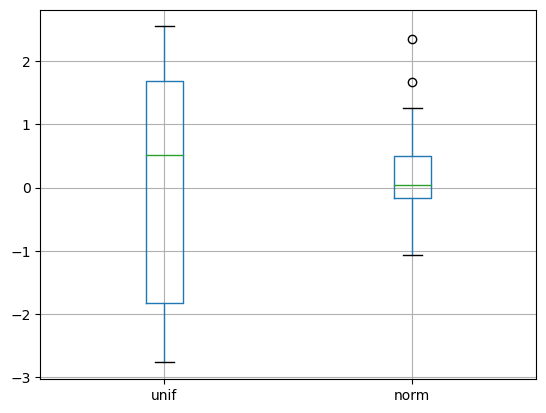

In [41]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
         'unif': np.random.uniform(-3, 3, 20),
         'norm': np.random.normal(0, 1, 20)
    })
print(df.head())  

df.boxplot(column=['unif', 'norm'])

2. Time series plot

In [44]:
df.index = pd.date_range('2000', freq='Y', periods=df.shape[0])
df.plot()

<Axes: >

3. Scatter plot

In [48]:
df.plot.scatter(x='unif', y='norm')

<Axes: xlabel='unif', ylabel='norm'>

## 4. Read & write data in Pandas 판다스를 이용해 데이터 읽고 쓰기
---

###  Pandas로 읽기
- **read_csv 혹은 아래 확장자에 맞게 작성**
- pd.read_csv('data/finance.csv')
### Pandas로 저장하기
- **to_csv 혹은 아래 확장자에 맞게 작성**
- pd.to_csv("저장할이름.csv")

![Pandas 읽고 쓰기](../img/pandas_read_write.png)